In [2]:
import pandas as ps
import numpy as pn
import matplotlib.pyplot as mt
import seaborn as sns

mt.style.use('ggplot')

import nltk
from sklearn.model_selection import train_test_split
import warnings
from keras.models import Sequential
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import re
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout


In [3]:
fd = ps.read_csv("C:/Users/Harshit/Downloads/Sentiment.csv", usecols=['text', 'sentiment'])
fd

,sentiment,text
0,Neutral,RT @NancyLeeGrahn: How did everyone feel about...
1,Positive,RT @ScottWalker: Didn't catch the full #GOPdeb...
2,Neutral,RT @TJMShow: No mention of Tamir Rice and the ...
3,Positive,RT @RobGeorge: That Carly Fiorina is trending ...
4,Positive,RT @DanScavino: #GOPDebate w/ @realDonaldTrump...
...,...,...
13866,Negative,RT @cappy_yarbrough: Love to see men who will ...
13867,Positive,RT @georgehenryw: Who thought Huckabee exceede...
13868,Positive,"RT @Lrihendry: #TedCruz As President, I will a..."
13869,Negative,RT @JRehling: #GOPDebate Donald Trump says tha...


In [4]:
fd.columns

Index(['sentiment', 'text'], dtype='object')

In [5]:
fd.shape

(13871, 2)

In [6]:
fd.groupby("sentiment").describe()

text                                                               
          count unique                                                top freq
sentiment                                                                     
Negative   8493   6129  RT @RWSurferGirl: Jeb Bush reminds me of eleva...  159
Neutral    3142   2729  RT @ericstonestreet: Trump has Cam hands. #GOP...   33
Positive   2236   1709  RT @RWSurferGirl: I think Cruz and Trump need ...   72

In [7]:
# x="Neutral"
# while x not in fd.sentiment:
#     if x=="Neutral":
#         break
#     else:
#         print(x)

In [8]:
fd.isnull().sum()/len(fd)*100

sentiment    0.0
text         0.0
dtype: float64

In [9]:
fd.columns

Index(['sentiment', 'text'], dtype='object')

In [11]:
fd.head(5)

,sentiment,text
0,Neutral,RT @NancyLeeGrahn: How did everyone feel about...
1,Positive,RT @ScottWalker: Didn't catch the full #GOPdeb...
2,Neutral,RT @TJMShow: No mention of Tamir Rice and the ...
3,Positive,RT @RobGeorge: That Carly Fiorina is trending ...
4,Positive,RT @DanScavino: #GOPDebate w/ @realDonaldTrump...


In [12]:
fd.dropna(inplace=True)

In [13]:
fd = fd[fd['sentiment'] != 'Neutral']

In [18]:
# fd['sentiment'] = fd['sentiment'].replace('Positive', 1)
# fd['sentiment'] = fd['sentiment'].replace('Negative', 0)
# fd.head()
fd['sentiment'] = fd['sentiment'].apply(lambda x: 0 if x == 'Negative' else 1)

C:\Users\Harshit\AppData\Local\Temp\ipykernel_29664\1937627485.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fd['sentiment'] = fd['sentiment'].apply(lambda x: 0 if x == 'Negative' else 1)


In [15]:
# def analysis(score):
#     if score < 0:
#         return 'Negative'
#     elif score == 0:
#         return 'Neutral'
#     else:
#         return 'Positive'

In [19]:
fd.sentiment.value_counts()

1    10729
Name: sentiment, dtype: int64

In [20]:
fd.isnull().sum()

sentiment    0
text         0
dtype: int64

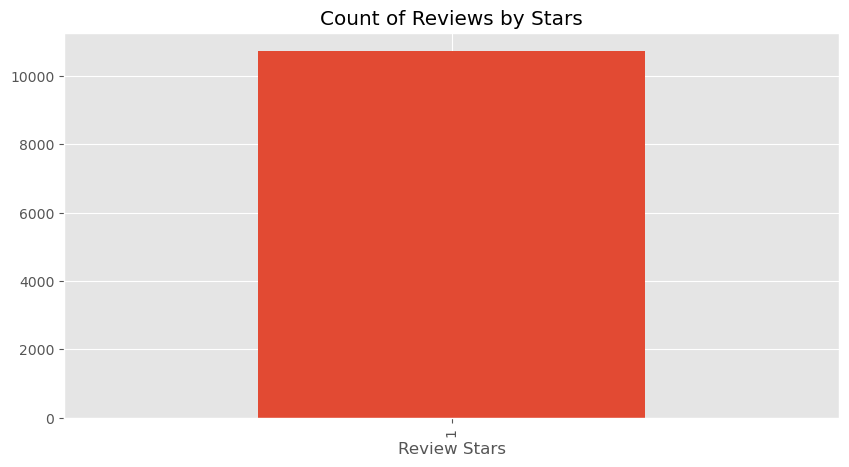

In [21]:
ax = fd['sentiment'].value_counts().sort_index() \
    .plot(kind='bar',
          title='Count of Reviews by Stars',
          figsize=(10, 5))
ax.set_xlabel('Review Stars')
mt.show()

In [31]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

In [32]:
sia = SentimentIntensityAnalyzer()

In [33]:
sia.polarity_scores('He is a great leader.')

{'neg': 0.0, 'neu': 0.423, 'pos': 0.577, 'compound': 0.6249}

In [34]:
sia.polarity_scores('He is a terrible leader.')

{'neg': 0.508, 'neu': 0.492, 'pos': 0.0, 'compound': -0.4767}

In [29]:
res = {}
for i, row in tqdm(fd.iterrows(), total=len(fd)):
    text = row['text']
    myid = row['id']
    res[myid] = sia.polarity_scores(text)

  0%|          | 0/13871 [00:00<?, ?it/s]

In [35]:
fd.head()

,id,sentiment,text
0,1,0.5,RT @NancyLeeGrahn: How did everyone feel about...
1,2,1.0,RT @ScottWalker: Didn't catch the full #GOPdeb...
2,3,0.5,RT @TJMShow: No mention of Tamir Rice and the ...
3,4,1.0,RT @RobGeorge: That Carly Fiorina is trending ...
4,5,1.0,RT @DanScavino: #GOPDebate w/ @realDonaldTrump...


In [27]:
fd.drop(["id"],axis=1,inplace=True)

### Seperating Positive and Negative Sentiements

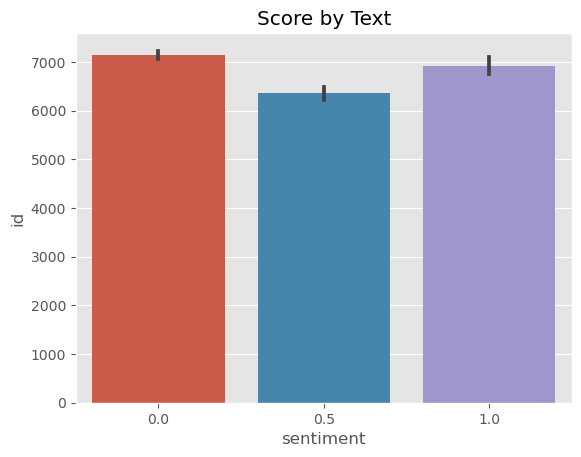

In [37]:
ax = sns.barplot(data=fd, x='sentiment', y='id')
ax.set_title('Score by Text')
mt.show()

In [38]:
fd.columns

Index(['id', 'sentiment', 'text'], dtype='object')

In [39]:
positive.sentiment.count()

2236

In [40]:
negative.sentiment.count()

8493

In [41]:
fd

,id,sentiment,text
0,1,0.5,RT @NancyLeeGrahn: How did everyone feel about...
1,2,1.0,RT @ScottWalker: Didn't catch the full #GOPdeb...
2,3,0.5,RT @TJMShow: No mention of Tamir Rice and the ...
3,4,1.0,RT @RobGeorge: That Carly Fiorina is trending ...
4,5,1.0,RT @DanScavino: #GOPDebate w/ @realDonaldTrump...
...,...,...,...
13866,13867,0.0,RT @cappy_yarbrough: Love to see men who will ...
13867,13868,1.0,RT @georgehenryw: Who thought Huckabee exceede...
13868,13869,1.0,"RT @Lrihendry: #TedCruz As President, I will a..."
13869,13870,0.0,RT @JRehling: #GOPDebate Donald Trump says tha...


In [ ]:
# fd['senti']=fd['sentiment'].apply(lambda x,y: 1 if x==('Positive') else (0 if (y=="Negative") else 0.5))
# fd.sample(5)

In [55]:
train_size = int(len(fd) * 0.8)
train_texts = fd['text'][:train_size]
train_labels = fd['sentiment'][:train_size]
val_texts = fd['text'][train_size:]
val_labels = fd['sentiment'][train_size:]

In [60]:
# tokenize the texts and pad the sequences to a fixed length
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(train_texts)
train_sequences = tokenizer.texts_to_sequences(train_texts)
val_sequences = tokenizer.texts_to_sequences(val_texts)
max_len = 100
train_padded = pad_sequences(train_sequences, maxlen=max_len, padding='post', truncating='post')
val_padded = pad_sequences(val_sequences, maxlen=max_len, padding='post', truncating='post')

In [65]:
# build the LSTM model
model = Sequential()
model.add(Embedding(input_dim=10000, output_dim=32, input_length=max_len))
model.add(LSTM(64))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

In [66]:
# compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [67]:
model.fit(train_padded, train_labels, validation_data=(val_padded, val_labels), epochs=5)


Epoch 1/5
347/347 [==============================] - 13s 30ms/step - loss: 0.0212 - accuracy: 0.9995 - val_loss: 6.5378e-05 - val_accuracy: 1.0000
Epoch 2/5
347/347 [==============================] - 10s 29ms/step - loss: 1.2037e-04 - accuracy: 1.0000 - val_loss: 2.4089e-05 - val_accuracy: 1.0000
Epoch 3/5
347/347 [==============================] - 12s 35ms/step - loss: 6.4661e-05 - accuracy: 1.0000 - val_loss: 1.2296e-05 - val_accuracy: 1.0000
Epoch 4/5
347/347 [==============================] - 11s 31ms/step - loss: 4.0745e-05 - accuracy: 1.0000 - val_loss: 7.2512e-06 - val_accuracy: 1.0000
Epoch 5/5
347/347 [==============================] - 10s 30ms/step - loss: 2.6223e-05 - accuracy: 1.0000 - val_loss: 4.7730e-06 - val_accuracy: 1.0000


In [68]:
# predict the sentiment for the two sentences
sentence1 = 'He is a great leader.'
sentence2 = 'He is a good leader.'
sequences = tokenizer.texts_to_sequences([sentence1, sentence2])

In [69]:
padded = pad_sequences(sequences, maxlen=max_len, padding='post', truncating='post')
predictions = model.predict(padded)
sentiments = ['positive' if p > 0.5 else 'negative' for p in predictions]
print('Sentiment for sentence 1:', sentiments[0])
print('Sentiment for sentence 2:', sentiments[1])

1/1 [==============================] - 0s 409ms/step
Sentiment for sentence 1: positive
Sentiment for sentence 2: positive
